In [12]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [13]:
import xarray as xr

Load the data from a run of the multicloud with a 5K warm pool using the parameters from FMK13. Remove the first 100 days. the simulation is performed with a grid spacing of dx=80 km, but the results are not sensitive to this number. FMK13 has a similar climatology.

In [68]:
data = xr.open_dataset("out.nc").sel(time=slice(100,None));

Here are some hovmoller diagrams of the simulation, to give you a sense of the flow.

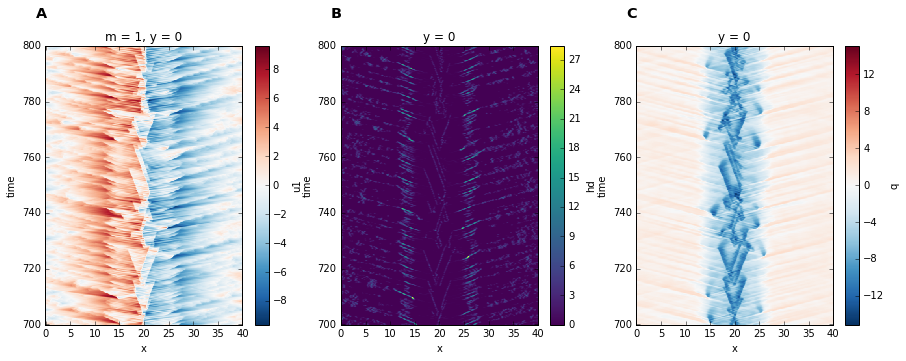

In [70]:
from gnl.plots import plotiter
from scipy.ndimage import gaussian_filter

pdata = data.sel(time=slice(700, None))
u1 = pdata.u.sel(m=1).squeeze().rename('u1')
hd = pdata.hd.squeeze().copy()
hd.values = gaussian_filter(hd, (.1, 1.5))
q = pdata.q.squeeze()

for da in plotiter([u1, hd, q], w=5):
    da.plot()

Here, are some climatological results from the simulation

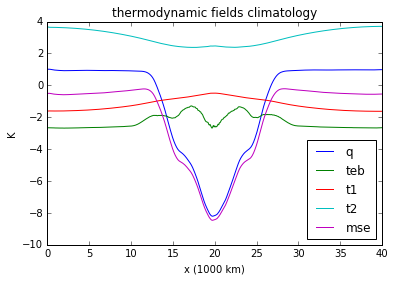

In [80]:
mse = (16* (data.q + 2*sqrt(2)/pi * data.th.sel(m=1)) + data.teb *.5)/16.5

for v in [data.q, data.teb, data.th.sel(m=1).rename('t1'), data.th.sel(m=2).rename('t2')]:

    v.mean('time').plot()
mse.mean('time').plot(label='mse')
plt.ylabel('K')
plt.xlabel('x (1000 km)')
plt.title('thermodynamic fields climatology')
plt.legend(loc="lower right");

The moisture attains its minimum at the warm pool center. Moist Static energy, which is closely related to moisture in the multicloud model, has a similar structure, but it's peak is at the edge of warm pool.

Here are the climatological heating rates.

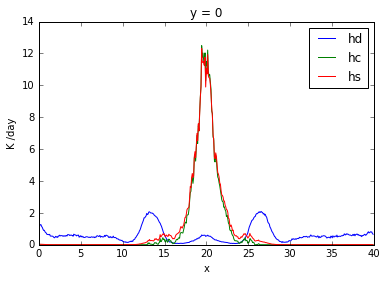

In [83]:
clim = data.mean('time')

clim.hd.plot()
clim.hc.plot()
clim.hs.plot()

plt.ylabel('K /day')
plt.legend();

It is difficult to see from the plot above, but the stratiform heating exceeds the congestus heating in most of the warm pool, but there is a peak in congestus at the center of the warm pool. The following plot shows the climatological difference $H_c - H_s$.

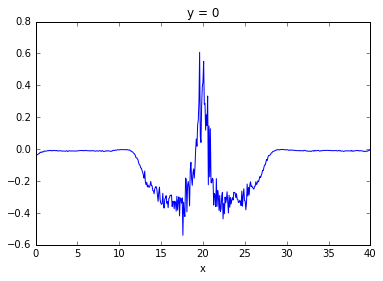

In [84]:
(data.hc-data.hs).mean('time').plot();

The minimum in moisture makes sense because the stratiform heating dominates in the warm pool. See the argument developed for the congestus dominated case on pp. 911 of "Multicloud Models for Organized Tropical Convection: Enhanced Congestus Heating" (2008). The reverse of this argument would predict a decrease in moisture with increased stratiform heating.